In [1]:
#importing the dependencies

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
#creating a dataFrame

In [7]:
df=pd.read_csv('creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#here v1 to v28 represents features(features written as v1.... because credit card involves sensitive information)

In [13]:
#check the null values

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

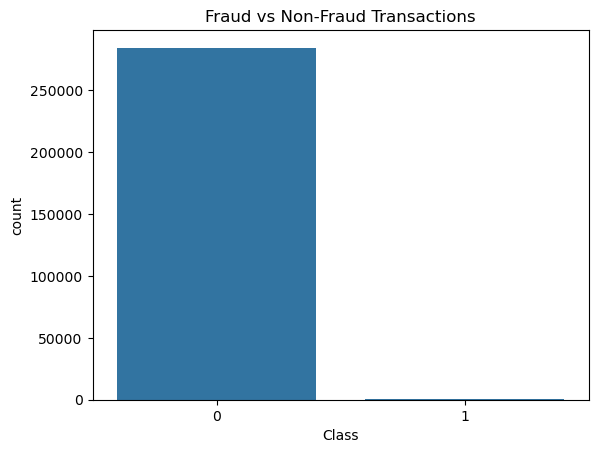

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

In [17]:
#since the data is imbalanced lets use undersampling technique to balance the data

In [19]:
#first seperate the data based on class

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
legit_trans=df[df['Class']==0]

In [27]:
legit_trans.shape

(284315, 31)

In [29]:
fraud_trans=df[df['Class']==1]

In [31]:
fraud_trans.shape

(492, 31)

In [33]:
#huge diff between legit trans and fraud trans thats why we called it as imbalanced data

In [ ]:
#undersampling the legit data(selecting randomly)

In [35]:
new_legit_trans=legit_trans.sample(n=492)

In [37]:
new_legit_trans.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235919,148597.0,2.369471,-1.443120,-0.998072,-1.687560,-1.152535,-0.346388,-1.319078,-0.116483,-0.861658,...,-0.225561,-0.116465,0.148251,-1.041744,-0.163257,-0.110534,0.023014,-0.058039,5.60,0
50870,44687.0,-0.812279,0.986067,0.718595,-1.219389,0.605092,-0.135067,0.388483,0.381139,-0.704301,...,0.027075,-0.021388,-0.181079,-0.868083,-0.221728,0.827495,-0.078626,0.026020,1.00,0
22513,32283.0,-1.544289,-1.793300,1.212887,-1.189024,-1.167484,0.206816,-1.050982,0.651549,-2.861632,...,0.352787,0.604456,0.328887,-0.296970,-0.213347,0.022102,0.012253,-0.105422,208.00,0
190335,128792.0,2.190255,-1.049219,-1.521564,-2.263973,-0.686060,-1.041320,-0.433155,-0.315140,0.407302,...,-0.012835,0.748844,-0.077611,-0.263784,0.303181,0.091819,0.013533,-0.070592,15.17,0
17112,28444.0,0.756871,-1.088885,0.804506,0.152646,-1.200884,0.136647,-0.469672,0.127261,0.766249,...,0.054733,-0.181509,-0.199502,0.096560,0.056288,0.967954,-0.078714,0.043391,236.84,0


In [41]:
new_legit_trans.shape

(492, 31)

In [45]:
new_df = pd.concat([new_legit_trans, fraud_trans], axis=0)

In [47]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235919,148597.0,2.369471,-1.443120,-0.998072,-1.687560,-1.152535,-0.346388,-1.319078,-0.116483,-0.861658,...,-0.225561,-0.116465,0.148251,-1.041744,-0.163257,-0.110534,0.023014,-0.058039,5.60,0
50870,44687.0,-0.812279,0.986067,0.718595,-1.219389,0.605092,-0.135067,0.388483,0.381139,-0.704301,...,0.027075,-0.021388,-0.181079,-0.868083,-0.221728,0.827495,-0.078626,0.026020,1.00,0
22513,32283.0,-1.544289,-1.793300,1.212887,-1.189024,-1.167484,0.206816,-1.050982,0.651549,-2.861632,...,0.352787,0.604456,0.328887,-0.296970,-0.213347,0.022102,0.012253,-0.105422,208.00,0
190335,128792.0,2.190255,-1.049219,-1.521564,-2.263973,-0.686060,-1.041320,-0.433155,-0.315140,0.407302,...,-0.012835,0.748844,-0.077611,-0.263784,0.303181,0.091819,0.013533,-0.070592,15.17,0
17112,28444.0,0.756871,-1.088885,0.804506,0.152646,-1.200884,0.136647,-0.469672,0.127261,0.766249,...,0.054733,-0.181509,-0.199502,0.096560,0.056288,0.967954,-0.078714,0.043391,236.84,0


In [49]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [51]:
X=new_df.drop(['Class'],axis=1)

In [53]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
235919,148597.0,2.369471,-1.443120,-0.998072,-1.687560,-1.152535,-0.346388,-1.319078,-0.116483,-0.861658,...,-0.466893,-0.225561,-0.116465,0.148251,-1.041744,-0.163257,-0.110534,0.023014,-0.058039,5.60
50870,44687.0,-0.812279,0.986067,0.718595,-1.219389,0.605092,-0.135067,0.388483,0.381139,-0.704301,...,-0.076895,0.027075,-0.021388,-0.181079,-0.868083,-0.221728,0.827495,-0.078626,0.026020,1.00
22513,32283.0,-1.544289,-1.793300,1.212887,-1.189024,-1.167484,0.206816,-1.050982,0.651549,-2.861632,...,0.533908,0.352787,0.604456,0.328887,-0.296970,-0.213347,0.022102,0.012253,-0.105422,208.00
190335,128792.0,2.190255,-1.049219,-1.521564,-2.263973,-0.686060,-1.041320,-0.433155,-0.315140,0.407302,...,-0.534821,-0.012835,0.748844,-0.077611,-0.263784,0.303181,0.091819,0.013533,-0.070592,15.17
17112,28444.0,0.756871,-1.088885,0.804506,0.152646,-1.200884,0.136647,-0.469672,0.127261,0.766249,...,0.448542,0.054733,-0.181509,-0.199502,0.096560,0.056288,0.967954,-0.078714,0.043391,236.84


In [59]:
y=new_df['Class']
y

235919    0
50870     0
22513     0
190335    0
17112     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [ ]:
#splitting the data

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=52)

In [127]:
X_train.shape

(787, 30)

In [129]:
X_test.shape

(197, 30)

In [ ]:
#importing the logistic regression algorithm

In [131]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#training the data

In [135]:
model.fit(X_train,y_train)

C:\Users\sriha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#testing the data

In [137]:
y_predicted=model.predict(X_test)

In [ ]:
#comparing

In [139]:
accuracy_score(y_predicted,y_test)

0.9543147208121827

In [ ]:
#importing metrics

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression Results:")
print(classification_report(y_test, y_predicted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

Confusion Matrix:
[[97  1]
 [ 8 91]]


In [143]:
#checking with other alogrithms too

In [145]:
#importing randomforestclassifier

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        98
           1       1.00      0.91      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

[[98  0]
 [ 9 90]]
0.9543147208121827


In [157]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 8.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/56.8 MB 9.9 MB/s eta 0:00:06
   --- ------------------------------------ 4.7/56.8 MB 8.9 MB/s eta 0:00:06
   --- ------------------------------------ 5.5/56.8 MB 8.2 MB/s eta 0:00:07
   ---- ----------------------------------- 6.0/56.8 MB 7.1 MB/s eta 0:00:08
   ---- ----------------------------------- 6.6/56.8 MB 5.9 MB/s eta 0:00:09
   ---- ----------------------------------- 6.8/56.8 MB 5.4 MB/s eta 0:00:10
   ----- ---------------------------------- 7.3/56.8 MB 4.6 MB/s eta 0:00:11
   ----- ---------------------------------- 7.6/56.8 MB 4.3 MB/s eta 0:00:12
   ----- ---------------------------------- 7.9/56.8 MB 4.0 MB/s eta 0:00:13
   ----- ---------------------------------- 8.1/56.8 MB 3.6 MB/s eta 0:00:14
   ----- ---------------------------------- 8.1/56.8 MB 3.6 MB/s eta 0:00:14
   --

In [ ]:
#importing xgboost algorithm

In [159]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

C:\Users\sriha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [161]:
y_predic=xgb_model.predict(X_test)

In [165]:
print(classification_report(y_test, y_predic))
print(confusion_matrix(y_test, y_predic))
print(accuracy_score(y_test,y_predic))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        98
           1       0.99      0.93      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

[[97  1]
 [ 7 92]]
0.9593908629441624


In [167]:
import pickle
pickle.dump(model, open("logistic_model.pkl", "wb"))
pickle.dump(rf, open("randomforest.pkl", "wb"))
pickle.dump(xgb_model, open("xgboost_model.pkl", "wb"))
